**Artificial Inteligence (CS550)**
<br>
Date: **29 April 2021**
<br>


Title: **Seminar 25**

Speaker: **Dr. Shota Tsiskaridze**


Articles:


<a href="https://towardsdatascience.com/transformers-141e32e69591">How Transformers Work</a>


<a href="http://jalammar.github.io/illustrated-transformer/">The Illustrated Transformer</a>

    
    
Useful Links:
    
   
<a href="https://arxiv.org/pdf/1607.06450.pdf">Layer Normalization</a>


<a href="https://huggingface.co/distilgpt2">DistilGPT2</a>


<a href="https://bit.ly/simple-transformer">Try it Yourself</a>


<a href="https://towardsdatascience.com/fastai-with-transformers-bert-roberta-xlnet-xlm-distilbert-4f41ee18ecb2">Fastai with 🤗Transformers</a>
   
    

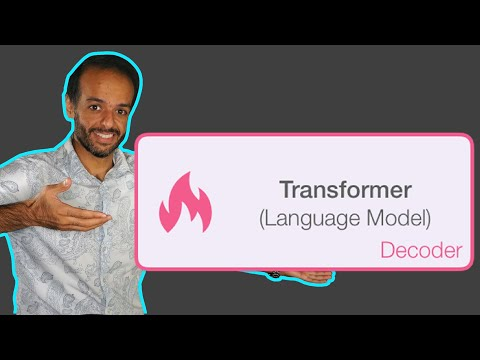

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('-QH8fRhqFHM', width=800, height=300)

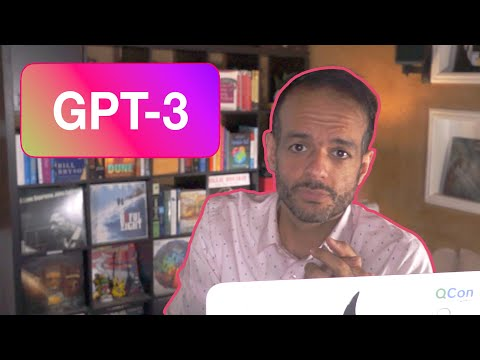

In [3]:
YouTubeVideo('MQnJZuBGmSQ', width=800, height=300)

In [4]:
!pip install transformers

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("distilgpt2") 
model = AutoModelForCausalLM.from_pretrained("distilgpt2", output_hidden_states=True)

In [6]:
text = "The Shawshank"

# Tokenize the input string
input = tokenizer.encode(text, return_tensors="pt")

# Run the model
output = model.generate(input, max_length=5, do_sample=False)

# Print the output
print('\n',tokenizer.decode(output[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 The Shawshank Redemption


In [7]:
# Print the token ides (of the input and output)
output

tensor([[  464, 18193,  1477,   962, 34433]])

### From words to vectors and back

In [8]:
# Print the input token ids
text = "The Shawshank"
input = tokenizer(text, return_tensors="pt")['input_ids']

In [9]:
tokenizer.convert_ids_to_tokens(input[0])

['The', 'ĠShaw', 'sh', 'ank']

### Breathe meaning into numbers (Embedding)

In [10]:
# This is the embedding matrix of the model
model.transformer.wte # Dimensions are: (Number of tokens in vocabulary, dimension of model)

Embedding(50257, 768)

In [12]:
import torch
# Get the embedding vector of token # 464 ('The')
model.transformer.wte(torch.tensor(464))

tensor([-6.2649e-02, -4.4906e-02,  5.5888e-02, -5.4657e-02, -1.1713e-01,
        -7.2870e-02, -2.2326e-01, -3.2198e-03,  6.8535e-03,  2.3608e-02,
        -5.8700e-02,  4.4439e-02,  7.4774e-02, -1.3818e-02,  1.1873e-01,
        -5.1842e-02,  5.4415e-02,  5.5382e-02, -3.3126e-02,  1.1923e-01,
        -7.3283e-02,  2.6658e-02, -8.4261e-02,  5.7980e-02, -4.2860e-03,
        -4.0704e-02,  6.5652e-02, -6.6221e-02, -1.0232e-01,  3.1356e-02,
        -1.8873e-02,  2.7774e-02, -2.0423e-02,  1.1994e-01, -8.7572e-02,
        -1.0579e-01, -3.1816e-01,  9.5807e-02,  1.1588e-01, -4.2873e-02,
         1.3187e-01, -1.3457e-01, -1.0421e-01, -1.2150e-01,  9.2551e-02,
        -2.7394e-02,  3.1406e-02,  6.4891e-03,  1.2296e-01, -2.0581e-01,
        -6.3499e-02,  5.4726e-02,  6.0272e-02,  1.1968e-01,  6.4859e-02,
        -3.4885e-01, -5.6065e-02, -2.4721e-03,  3.7549e-03, -1.2817e-02,
        -8.4894e-02, -1.6269e-02,  8.2583e-02, -4.0134e-02, -2.1432e-01,
        -2.6889e-03,  1.5291e-02,  5.2090e-02,  2.9

In [13]:
text = "The chicken didn't cross the road because it was"

# Tokenize the input string
input = tokenizer.encode(text, return_tensors="pt")

# Run the model
output = model.generate(input, max_length=20, do_sample=True)

# Print the output
print('\n',tokenizer.decode(output[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 The chicken didn't cross the road because it was a chicken and not its own bird, which is
